<a href="https://colab.research.google.com/github/masevs/nct27-complexity-analysis/blob/main/notebooks/Classify_songs_by_difficulty_(or_clusters)_using_spectrogram_images_%2B_deep_learning_nct127.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()  # upload your .mp3 or .wav files


Saving 2 Baddies.wav to 2 Baddies.wav
Saving Ay yo.wav to Ay yo.wav
Saving Cherry Bomb.wav to Cherry Bomb.wav
Saving Fact Check.wav to Fact Check.wav
Saving Kick It.wav to Kick It.wav
Saving Simon Says.wav to Simon Says.wav
Saving Sticker.wav to Sticker.wav


In [ ]:
import os
os.makedirs("/content/nct127_audio", exist_ok=True)

for filename in uploaded.keys():
    os.rename(filename, f"/content/nct127_audio/{filename}")


In [ ]:
import os

audio_path = "/content/nct127_audio"
if os.path.exists(audio_path):
    print("🎧 Checking /content/nct127_audio ...")
    for file in os.listdir(audio_path):
        print("✅ Found:", file)
else:
    print("❌ Folder not found. You may need to re-upload.")


🎧 Checking /content/nct127_audio ...
✅ Found: Ay yo.wav
✅ Found: Sticker.wav
✅ Found: Simon Says.wav
✅ Found: Kick It.wav
✅ Found: 2 Baddies.wav
✅ Found: Fact Check.wav
✅ Found: Cherry Bomb.wav


In [ ]:
import os

print("🎧 Files in /content/nct127_audio:")
for file in os.listdir("/content/nct127_audio"):
    print("-", file)


🎧 Files in /content/nct127_audio:
- Ay yo.wav
- Sticker.wav
- Simon Says.wav
- Kick It.wav
- 2 Baddies.wav
- Fact Check.wav
- Cherry Bomb.wav


In [ ]:
import os

print("📄 Actual audio files in your folder:")
actual_files = os.listdir("/content/nct127_audio")
for file in actual_files:
    print("-", file)


📄 Actual audio files in your folder:
- Ay yo.wav
- Sticker.wav
- Simon Says.wav
- Kick It.wav
- 2 Baddies.wav
- Fact Check.wav
- Cherry Bomb.wav


In [ ]:
# Replace with EXACT output from Step 1
difficulty_labels = {
    'Sticker.wav': 'hard',
    'Kick It.wav': 'hard',
    'Simon Says.wav': 'hard',
    'Ay yo.wav': 'medium',
    'Fact Check.wav': 'medium',
    'Cherry Bomb.wav': 'easy',
    '2 Baddies.wav': 'easy'
}


In [ ]:
import numpy as np


In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import os

output_dir = '/content/spectrograms'
os.makedirs(output_dir, exist_ok=True)

for filename, label in difficulty_labels.items():
    try:
        audio_path = f'/content/nct127_audio/{filename}'
        y, sr = librosa.load(audio_path, duration=60)

        S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
        S_dB = librosa.power_to_db(S, ref=np.max)

        label_dir = os.path.join(output_dir, label)
        os.makedirs(label_dir, exist_ok=True)

        plt.figure(figsize=(2.56, 2.56))
        librosa.display.specshow(S_dB, sr=sr, cmap='magma')
        plt.axis('off')
        plt.tight_layout()
        image_path = os.path.join(label_dir, f"{filename.split('.')[0]}.png")
        plt.savefig(image_path, dpi=50, bbox_inches='tight', pad_inches=0)
        plt.close()
        print(f"✅ Saved: {image_path}")

    except Exception as e:
        print(f"❌ Failed for {filename}: {e}")


✅ Saved: /content/spectrograms/hard/Sticker.png
✅ Saved: /content/spectrograms/hard/Kick It.png
✅ Saved: /content/spectrograms/hard/Simon Says.png
✅ Saved: /content/spectrograms/medium/Ay yo.png
✅ Saved: /content/spectrograms/medium/Fact Check.png
✅ Saved: /content/spectrograms/easy/Cherry Bomb.png
✅ Saved: /content/spectrograms/easy/2 Baddies.png


In [ ]:
for root, dirs, files in os.walk("/content/spectrograms"):
    print(f"{root} → {len(files)} file(s)")


/content/spectrograms → 0 file(s)
/content/spectrograms/easy → 2 file(s)
/content/spectrograms/hard → 3 file(s)
/content/spectrograms/medium → 2 file(s)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    '/content/spectrograms',
    target_size=(128, 128),
    batch_size=8,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    '/content/spectrograms',
    target_size=(128, 128),
    batch_size=8,
    class_mode='categorical',
    subset='validation'
)


Found 7 images belonging to 3 classes.
Found 0 images belonging to 3 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # 3 output classes
])

model.compile(optimizer=Adam(learning_rate=0.0003),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     3,686,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,706,051 (14.14 MB)

 Trainable params: 3,706,051 (14.14 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
difficulty_labels = {
        'Sticker.wav': 'hard',
        'Kick It.wav': 'hard',
        'Simon Says.wav': 'hard',
        'Ay yo.wav': 'medium',
        'Fact Check.wav': 'medium',
        'Cherry Bomb.wav': 'easy',
        '2 Baddies.wav': 'easy'
    }

In [ ]:
import os

for root, dirs, files in os.walk("/content/spectrograms"):
    print(f"{root} → {len(files)} file(s)")


/content/spectrograms → 0 file(s)
/content/spectrograms/easy → 2 file(s)
/content/spectrograms/hard → 3 file(s)
/content/spectrograms/medium → 2 file(s)


In [ ]:
import os
import shutil
import random

# Set seed for reproducibility
random.seed(42)

# Paths
SOURCE_DIR = 'spectrograms'
TARGET_DIR = 'data'

splits = ['train', 'val']
classes = ['easy', 'medium', 'hard']
split_ratio = 0.8

# Create directories
for split in splits:
    for cls in classes:
        os.makedirs(os.path.join(TARGET_DIR, split, cls), exist_ok=True)

# Move files
for cls in classes:
    files = os.listdir(os.path.join(SOURCE_DIR, cls))
    random.shuffle(files)
    split_idx = int(len(files) * split_ratio)

    train_files = files[:split_idx]
    val_files = files[split_idx:]

    for f in train_files:
        shutil.copy(os.path.join(SOURCE_DIR, cls, f), os.path.join(TARGET_DIR, 'train', cls, f))

    for f in val_files:
        shutil.copy(os.path.join(SOURCE_DIR, cls, f), os.path.join(TARGET_DIR, 'val', cls, f))

print("Split complete.")


Split complete.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)

train_gen = datagen.flow_from_directory(
    'data/train',
    target_size=(224, 224),
    batch_size=2,
    class_mode='categorical'
)

val_gen = datagen.flow_from_directory(
    'data/val',
    target_size=(224, 224),
    batch_size=2,
    class_mode='categorical'
)


Found 4 images belonging to 3 classes.
Found 3 images belonging to 3 classes.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)

train_gen = datagen.flow_from_directory(
    'data/train',
    target_size=(128, 128),  # Changed to (128, 128)
    batch_size=2,
    class_mode='categorical'
)

val_gen = datagen.flow_from_directory(
    'data/val',
    target_size=(128, 128),  # Changed to (128, 128)
    batch_size=2,
    class_mode='categorical'
)

Found 4 images belonging to 3 classes.
Found 3 images belonging to 3 classes.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)

train_gen = datagen.flow_from_directory(
    'data/train',
    target_size=(128, 128),  # Make sure target_size matches model input
    batch_size=2,
    class_mode='categorical'
)

val_gen = datagen.flow_from_directory(
    'data/val',
    target_size=(128, 128),  # Make sure target_size matches model input
    batch_size=2,
    class_mode='categorical'
)

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=30
)

Found 4 images belonging to 3 classes.
Found 3 images belonging to 3 classes.
Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 389ms/step - accuracy: 0.8333 - loss: 1.3656 - val_accuracy: 0.3333 - val_loss: 2.0564
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 0.5000 - loss: 1.3803 - val_accuracy: 0.3333 - val_loss: 1.3526
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - accuracy: 0.6667 - loss: 0.7739 - val_accuracy: 0.3333 - val_loss: 1.2422
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.5000 - loss: 1.0490 - val_accuracy: 0.3333 - val_loss: 1.1340
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.6667 - loss: 0.9624 - val_accuracy: 0.3333 - val_loss: 1.1644
Epoch 6/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.6667 - loss: 0.8810 - val_accuracy: 0.3333 - val_loss: 1.2053
Epoch 7/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - accuracy: 0.8333 - loss: 0.7428 - val_accuracy: 0.3333 - val_loss: 1.3149
Epoch 8/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.8333 - loss: 0.6110 - val_accuracy: 0.3333 - val_loss: 1.4309
Epo

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Add augmentations for training set only
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    shear_range=0.1,
    horizontal_flip=False,  # don't flip audio spectrograms horizontally!
    fill_mode='nearest',
    validation_split=0.2
)

# Validation generator: only rescale
val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Assuming you have this directory structure already:
# spectrograms/
#   easy/
#   medium/
#   hard/
train_gen = train_datagen.flow_from_directory(
    'spectrograms',
    target_size=(224, 224),  # or your actual spectrogram size
    batch_size=2,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen = val_datagen.flow_from_directory(
    'spectrograms',
    target_size=(224, 224),
    batch_size=2,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 7 images belonging to 3 classes.
Found 0 images belonging to 3 classes.


In [ ]:
train_gen = datagen.flow_from_directory(
    'spectrograms',
    target_size=(224, 224),  # <-- match this to your model's input
    class_mode='categorical',
    batch_size=16
)


Found 7 images belonging to 3 classes.


In [ ]:
!pip install tensorflow
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),  # <-- must match above
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
from tensorflow.keras import backend as K
K.clear_session()


In [ ]:
train_gen = train_datagen.flow_from_directory(
    'data/train',  # Changed path to 'data/train'
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    shuffle=True
)

# Use the same 'spectrograms' directory for validation and specify subset
val_gen = val_datagen.flow_from_directory(
    'data/val',  # Changed path to 'data/val'
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    shuffle=False
)

Found 4 images belonging to 3 classes.
Found 3 images belonging to 3 classes.


In [ ]:
# Add augmentations for training set only
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    shear_range=0.1,
    horizontal_flip=False,  # don't flip audio spectrograms horizontally!
    fill_mode='nearest'
)

# Validation generator: only rescale
val_datagen = ImageDataGenerator(
    rescale=1./255
)

train_gen = train_datagen.flow_from_directory(
    'data/train',  # Changed path to 'data/train'
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    shuffle=True
)

# Use the same 'spectrograms' directory for validation and specify subset
val_gen = val_datagen.flow_from_directory(
    'data/val',  # Changed path to 'data/val'
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    shuffle=False
)

Found 4 images belonging to 3 classes.
Found 3 images belonging to 3 classes.


In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=30
)


Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.2500 - loss: 1.1748 - val_accuracy: 0.3333 - val_loss: 74.0621
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 46.6204 - val_accuracy: 0.3333 - val_loss: 27.8626
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5000 - loss: 14.5071 - val_accuracy: 0.3333 - val_loss: 39.4551
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.2500 - loss: 46.4827 - val_accuracy: 0.3333 - val_loss: 19.8121
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.2500 - loss: 27.8979 - val_accuracy: 0.3333 - val_loss: 12.7741
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.2500 - loss: 15.1706 - val_accuracy: 0.3333 - val_loss: 15.8636
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.2500 - loss: 15.8375 - val_accuracy: 0.3333 - val_loss: 13.5143
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.2500 - loss: 10.4568 - val_accuracy: 0.3333 - val_loss: 17.3158
E

In [ ]:
model.evaluate(val_gen)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.0000e+00 - loss: 3.5592


[3.5592267513275146, 0.0]

In [ ]:
model.save("nct127_complexity_model.h5")


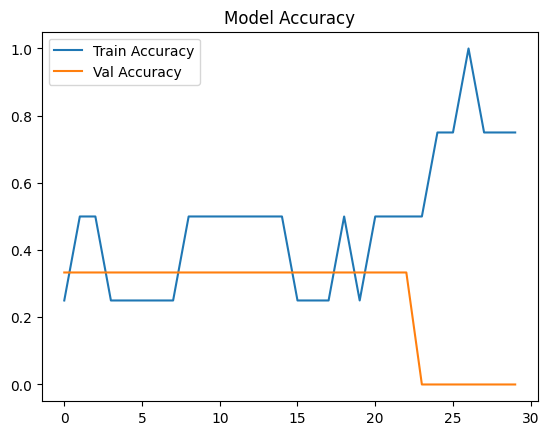

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


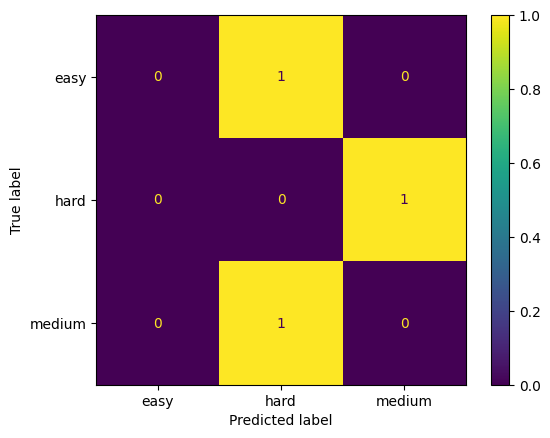

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Load validation set labels
y_true = val_gen.classes
y_pred = model.predict(val_gen)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=val_gen.class_indices)
disp.plot()


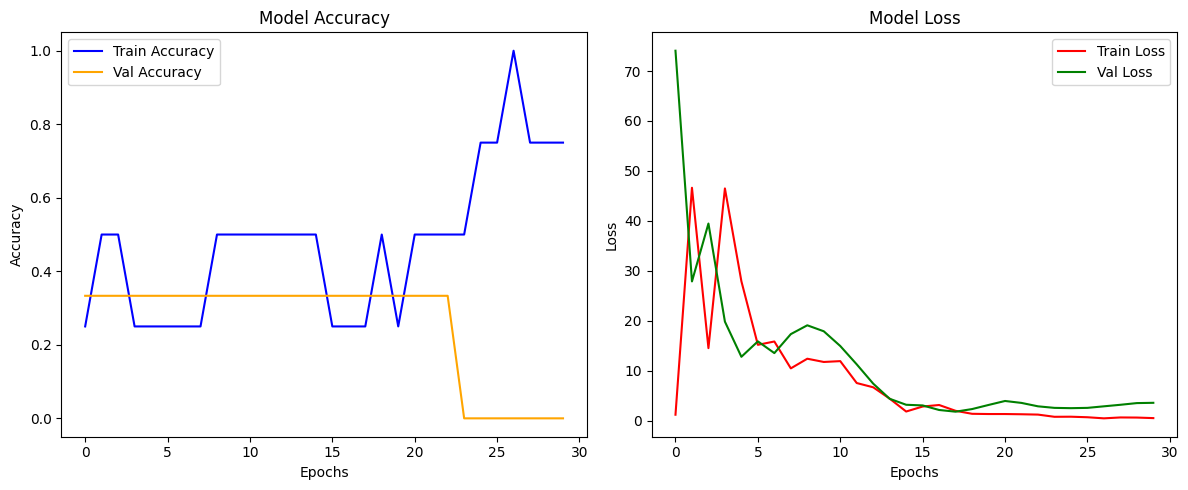

In [ ]:
import matplotlib.pyplot as plt

# Extract history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b-', label='Train Accuracy')
plt.plot(epochs, val_acc, 'orange', label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'r-', label='Train Loss')
plt.plot(epochs, val_loss, 'green', label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Replace 'actual_spectrogram_path.png' with the actual path to your spectrogram file
img_path = "/content/spectrograms/easy/Cherry Bomb.png"  # Example path, replace if needed

img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)

print("Predicted class:", list(val_gen.class_indices.keys())[predicted_class])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Predicted class: hard
